<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/Lab_12_IntroMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Mapping
We'll cover some of the basics of using GIS data and the data management tools we've used earlier in the semester.

To begin, we need a shapefile to be able to draw a map of the geography of interest. In this example, I'll use a file for nation-states. (There are open source shapefiles for geographies at lots of different scales--cities, regions, nations, the world.)

Here's the link for the global shapefile: https://www.geoboundaries.org/globalDownloads.html

I'm using the geoPackage format for this example. **We'll use GeoPandas for data managment. It is based on pandas and has useful mapping functions.**

User guide: https://geopandas.org/en/stable/docs/user_guide.html

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install folium
!pip install mapclassify


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.7 MB/s eta 0:00:00


In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import folium
import mapclassify
import shapefile



In [7]:
GlobalIndicators_map = gpd.read_file('geoBoundariesCGAZ_ADM0.gpkg')
GlobalIndicators_map.head()

DataSourceError: 'geoBoundariesCGAZ_ADM0.gpkg' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

<Axes: >

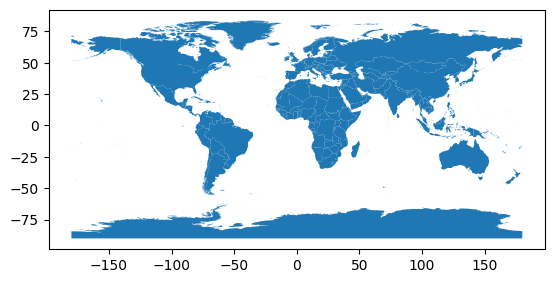

In [ ]:
# Goal is to produce a map that shows some sociological information
GlobalIndicators_map.plot()

In [ ]:
GlobalIndicators_health = pd.read_csv('/content/drive/MyDrive/Data/global_health.csv')
GlobalIndicators_demog = pd.read_csv('/content/drive/MyDrive/Data/demographics_dataset.csv')

In [ ]:
# Look at year variable
GlobalIndicators_health['Year'].value_counts()

Year
2012    188
2013    188
2014    188
2015    188
2016    188
2017    188
2018    188
2019    188
2020    188
2021    188
Name: count, dtype: int64

In [ ]:
# Sample all cases from 2021
GlobalIndicators_health = GlobalIndicators_health.loc[lambda GlobalIndicators_health: GlobalIndicators_health['Year'] == 2021, :]

In [ ]:
# All the variables in the dataset
GlobalIndicators_health.columns

Index(['Country', 'Country_Code', 'Year', 'Fertility_Rate',
       'Urban_Population_Percent', 'Total_Population', 'Water_Access_Percent',
       'Unemployment_Rate', 'Sanitary_Expense_Per_GDP', 'Life_Expectancy',
       'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Infant_Deaths',
       'GDP_Per_Capita', 'Hospital_Beds_Per_1000', 'Female_Population',
       'Male_Population', 'Alcohol_Consumption_Per_Capita',
       'Immunization_Rate', 'Sanitary_Expense_Per_Capita',
       'CO2_Exposure_Percent', 'Air_Pollution', 'Labour_Force_Total',
       'Tuberculosis_Per_100000', 'Suicide_Rate_Percent',
       'Obesity_Rate_Percent', 'Underweight_Rate_Percent',
       'Overweight_Rate_Percent', 'Safe_Water_Access_Percent'],
      dtype='object')

In [ ]:
# Use merge method in geopandas to combine the dataframes of demographics_dataset & global_health into the map data

# Matching them up based on the IS03 & Country_Code = combine cases correctly
# Geo data gets added to demo & health data for each country
GlobalIndicators_map = GlobalIndicators_map.merge(GlobalIndicators_demog, left_on='shapeGroup', right_on='ISO3')
GlobalIndicators_map = GlobalIndicators_map.merge(GlobalIndicators_health, left_on='shapeGroup', right_on='Country_Code')


GlobalIndicators_map.head()

id shapeGroup shapeType       shapeName  \
0  None        AFG      ADM0     Afghanistan   
1  None        GBR      ADM0  United Kingdom   
2  None        ALB      ADM0         Albania   
3  None        DZA      ADM0         Algeria   
4  None        USA      ADM0   United States   

                                            geometry ISO3       Country_x  \
0  POLYGON ((74.88986 37.23408, 74.88959 37.23314...  AFG     Afghanistan   
1  MULTIPOLYGON (((33.013 34.64377, 33.01273 34.6...  GBR  United Kingdom   
2  POLYGON ((20.07889 42.55579, 20.07929 42.55547...  ALB         Albania   
3  POLYGON ((8.64195 36.94096, 8.64195 36.94069, ...  DZA         Algeria   
4  MULTIPOLYGON (((-168.15793 -14.53181, -168.161...  USA   United States   

  Human Development Groups UNDP Developing Regions  HDI Rank (2021)  ...  \
0                      Low                      SA            180.0  ...   
1                Very High                     NaN             18.0  ...   
2                     High                     ECA             67.0  ...   
3                     High                      AS             91.0  ...   
4                Very High                     NaN             21.0  ...   

   Sanitary_Expense_Per_Capita CO2_Exposure_Percent Air_Pollution  \
0                    81.319763                  NaN           NaN   
1                  5738.484863                  NaN           NaN   
2                   464.742859                  NaN           NaN   
3                   204.566620                  NaN           NaN   
4                 12012.241211                  NaN           NaN   

   Labour_Force_Total  Tuberculosis_Per_100000  Suicide_Rate_Percent  \
0           9356574.0                    185.0                   NaN   
1          34311328.0                      NaN                   NaN   
2           1382433.0                     15.0                   NaN   
3          12202063.0                     54.0                   NaN   
4         166198588.0                      NaN                   NaN   

   Obesity_Rate_Percent  Underweight_Rate_Percent  Overweight_Rate_Percent  \
0                 12.64                      5.70                    42.81   
1                   NaN                       NaN                      NaN   
2                 22.36                      0.71                    57.27   
3                 15.32                      4.05                    49.49   
4                   NaN                       NaN                      NaN   

   Safe_Water_Access_Percent  
0                      72.96  
1                        NaN  
2                      94.09  
3                      90.37  
4                        NaN  

[5 rows x 40 columns]

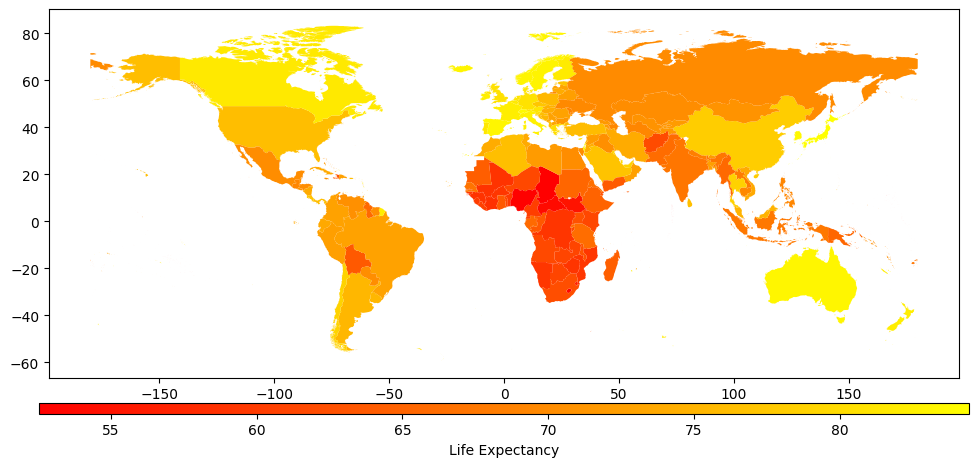

In [ ]:
# Code here lets you edit the design of the map
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(12, 24))  #subplots method controls map size
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.25)

# drawas map and legend
GlobalIndicators_map.plot(
    column='Life_Expectancy',
    ax=ax,
    legend=True,
    cax=cax,
    cmap='autumn', #built-in color map
    legend_kwds={"label": "Life Expectancy", "orientation": "horizontal"}, #Places the label of life expectancy horizontally
);


You can see options for color maps for the plot here:
https://matplotlib.org/stable/users/explain/colors/colormaps.html

- You can create your own colors if you don't like the defaults

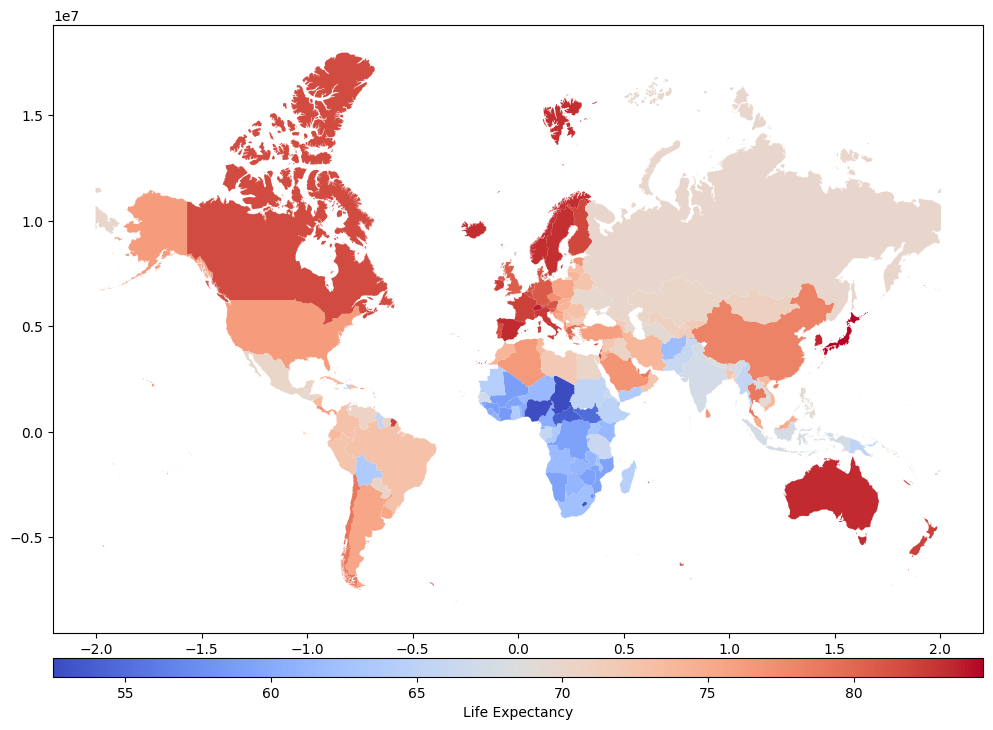

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(12, 24))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.25)

# Here, we're going to change the projection of the map
GlobalIndicators_map = GlobalIndicators_map.to_crs(epsg=6893) #to_crs will supply projection

GlobalIndicators_map.plot(
    column='Life_Expectancy',
    ax=ax,
    legend=True,
    cax=cax,
    cmap='coolwarm',
    legend_kwds={"label": "Life Expectancy", "orientation": "horizontal"},
);


GeoPandas uses the PROJ library for map projections. You can see the options here: https://proj.org/en/stable/operations/projections/index.html

In [ ]:
# We can create new variables based on the variables in the data files if we want to tell a particular story with the maps.

#Create variable that measures differences b/w life expectancy for men & women

GlobalIndicators_map['Life Expectancy Diff'] = GlobalIndicators_map['Life_Expectancy_Female'] - GlobalIndicators_map['Life_Expectancy_Male']
GlobalIndicators_map['Life Expectancy Diff'].describe()

count    184.000000
mean       5.332217
std        1.885847
min        0.785000
25%        3.998750
50%        5.071000
75%        6.450500
max       10.796000
Name: Life Expectancy Diff, dtype: float64

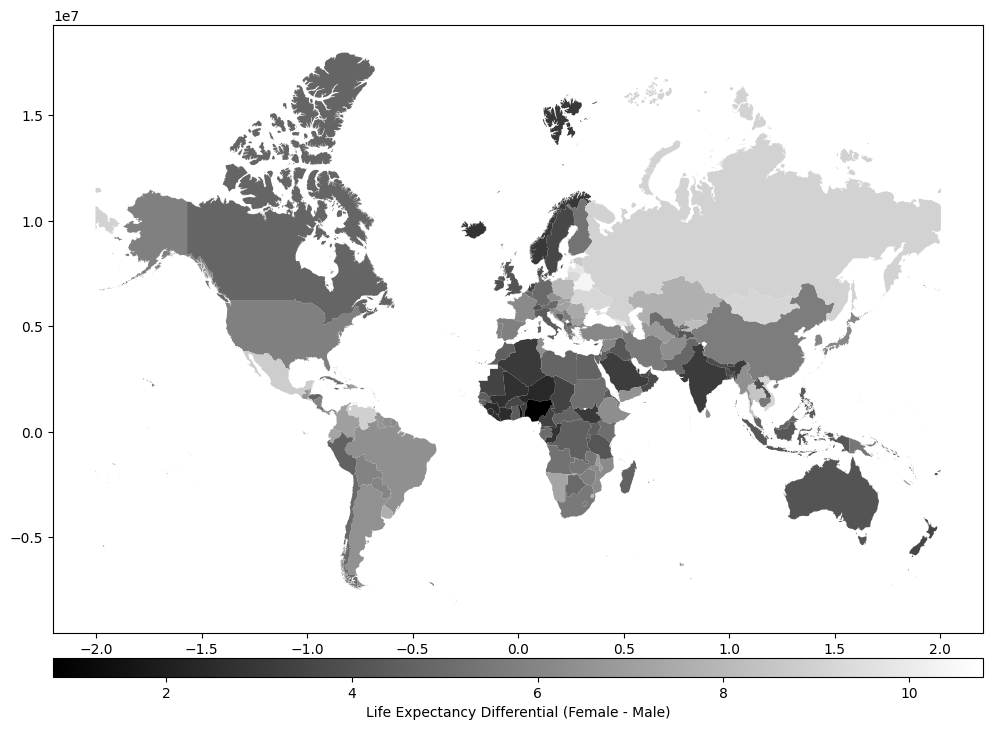

In [ ]:
#This map shows a grayscale map that can be good for print journals

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(12, 24))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.25)

# Here, we're going to change the projection of the map
GlobalIndicators_map = GlobalIndicators_map.to_crs(epsg=6893)

GlobalIndicators_map.plot(
    column='Life Expectancy Diff',
    ax=ax,
    legend=True,
    cax=cax,
    cmap='grey',
    legend_kwds={"label": "Life Expectancy Differential (Female - Male)", "orientation": "horizontal"},
);


In [14]:
# Here, we're going to read in a geoJSON file from a server to create the geoPandas DataFrame.
# This one is from NYC Department of City Planning for City Council districts. You can find others
# at https://www.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page

url = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_City_Council_Districts/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'

nycd_map = gpd.read_file(url)
nycd_map.head()


OBJECTID  CounDist   Shape__Area  Shape__Length  \
0         1         3  7.631671e+07   81955.340465   
1         2         6  8.267269e+07   56770.177483   
2         3         7  5.518614e+07   52375.098402   
3         4        27  2.108055e+08   86554.050688   
4         5        38  1.517368e+08  177740.220476   

                                            geometry  
0  POLYGON ((-73.99631 40.76981, -73.99526 40.769...  
1  POLYGON ((-73.95111 40.79429, -73.9516 40.7936...  
2  POLYGON ((-73.94137 40.8309, -73.94152 40.8305...  
3  POLYGON ((-73.72966 40.72049, -73.72924 40.719...  
4  POLYGON ((-73.99265 40.64174, -73.99336 40.641...

<Axes: >

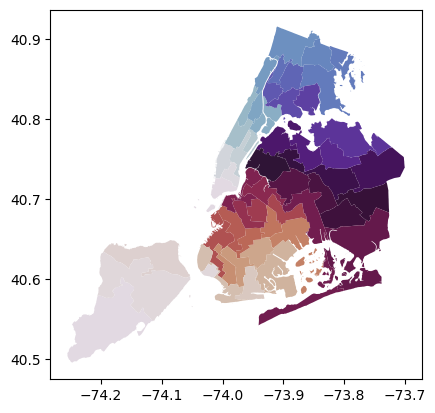

In [62]:
#Basemap of city council district
nycd_map.plot(column='CounDist', cmap='twilight')

In [63]:
#NYC Owned and Leased Properties (COLP) - https://www.nyc.gov/site/planning/data-maps/open-data/dwn-colp.page
#Gives coordinates for properties

#Can plot locations on base map of NYC

nycdoh_map = gpd.read_file('https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/COLP/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson')
nycdoh_map.head()


OBJECTID                               uid BOROUGH  BLOCK  LOT         BBL  \
0         1  00009e663e23b087adad08d9e91477df       3   3976    1  3039760001   
1         2  00018bbc777cdde96eaafbc4c1175a27       5   4781   10  5047810010   
2         3  00091162e1f190b1617e5fa7d0bcf5d4       4   9172    1  4091720001   
3         4  000b480f2dfbabe8f0883112498dbfea       5   7765   51  5077650051   
4         5  000be7e47acf95d6a03839cbc498a4e7       4   8198  165  4081980165   

       MAPBBL     CD    HNUM             SNAME  ...  \
0  3039760001  305.0      85    MONTAUK AVENUE  ...   
1  5047810010  503.0      89  FOX BEACH AVENUE  ...   
2  4091720001  410.0  109-15         98 STREET  ...   
3  5077650051  503.0    None      DAMON STREET  ...   
4  4081980165  411.0    None   RUSHMORE AVENUE  ...   

                     EXCATDESC LEASED FINALCOM AGREEMENT   XCOORD  YCOORD  \
0  CULTURAL & RECREATIONAL USE   None     None      None  1017957  186113   
1  CULTURAL & RECREATIONAL USE   None     None      None   952584  140446   
2              EDUCATIONAL USE   None     None      None  1028797  186384   
3  CULTURAL & RECREATIONAL USE   None     None      None   920725  126749   
4         PROPERTY WITH NO USE   None     None      None  1056051  217365   

    LATITUDE  LONGITUDE DCPEDITED                    geometry  
0  40.677450 -73.878478      None  POINT (-73.87848 40.67746)  
1  40.552111 -74.113949      None  POINT (-74.11395 40.55212)  
2  40.678146 -73.839396      None   POINT (-73.8394 40.67815)  
3  40.514345 -74.228464      None  POINT (-74.22847 40.51435)  
4  40.763002 -73.740808      None  POINT (-73.74081 40.76301)  

[5 rows x 28 columns]

In [64]:
 #Eliminate cases w/o location data OR had location outside of NYC

nycdoh_map = nycdoh_map.loc[lambda nycdoh_map: nycdoh_map['LONGITUDE'] != 'None', :]
nycdoh_map = nycdoh_map.loc[lambda nycdoh_map: nycdoh_map['LATITUDE'] != 'None', :]
nycdoh_map = nycdoh_map.loc[lambda nycdoh_map: nycdoh_map['LONGITUDE'] != 0, :]
nycdoh_map = nycdoh_map.loc[lambda nycdoh_map: nycdoh_map['LATITUDE'] != 0, :]

In [65]:
nycdoh_map['LONGITUDE'].describe()

count    2000.000000
mean      -73.956560
std         0.129729
min       -74.253676
25%       -74.012582
50%       -73.934540
75%       -73.862271
max       -73.721631
Name: LONGITUDE, dtype: float64

In [66]:
nycdoh_map.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    2000 non-null   int32   
 1   uid         2000 non-null   object  
 2   BOROUGH     2000 non-null   object  
 3   BLOCK       2000 non-null   int32   
 4   LOT         2000 non-null   int32   
 5   BBL         2000 non-null   int64   
 6   MAPBBL      2000 non-null   int64   
 7   CD          1999 non-null   float64 
 8   HNUM        1030 non-null   object  
 9   SNAME       1921 non-null   object  
 10  ADDRESS     1921 non-null   object  
 11  PARCELNAME  1588 non-null   object  
 12  AGENCY      2000 non-null   object  
 13  USECODE     2000 non-null   object  
 14  USETYPE     2000 non-null   object  
 15  OWNERSHIP   2000 non-null   object  
 16  CATEGORY    2000 non-null   int32   
 17  EXPANDCAT   1993 non-null   float64 
 18  EXCATDESC   1993 non-null   object  
 19  LEA

The DOH inspection data file has location information, coded as longitude and latitude. To use it with geoPandas, we'll need to create a geometry variable, a data object in geoPandas. This will allow us to plot the locations as points.

To do this, we'll use the shapely library and then convert the DOH data file to a new geoPandas map geoDataFrame.

In [67]:
# Merge basemap city council and COLP on the LONGITUDE & LATITUDE

from shapely.geometry import Point, Polygon
geometry = [Point(xy) for xy in zip(nycdoh_map['LONGITUDE'], nycdoh_map['LATITUDE'])]
nyc_map = gpd.GeoDataFrame(nycdoh_map, crs='EPSG:4326', geometry=geometry)
nyc_map.head()

OBJECTID                               uid BOROUGH  BLOCK  LOT         BBL  \
0         1  00009e663e23b087adad08d9e91477df       3   3976    1  3039760001   
1         2  00018bbc777cdde96eaafbc4c1175a27       5   4781   10  5047810010   
2         3  00091162e1f190b1617e5fa7d0bcf5d4       4   9172    1  4091720001   
3         4  000b480f2dfbabe8f0883112498dbfea       5   7765   51  5077650051   
4         5  000be7e47acf95d6a03839cbc498a4e7       4   8198  165  4081980165   

       MAPBBL     CD    HNUM             SNAME  ...  \
0  3039760001  305.0      85    MONTAUK AVENUE  ...   
1  5047810010  503.0      89  FOX BEACH AVENUE  ...   
2  4091720001  410.0  109-15         98 STREET  ...   
3  5077650051  503.0    None      DAMON STREET  ...   
4  4081980165  411.0    None   RUSHMORE AVENUE  ...   

                     EXCATDESC LEASED FINALCOM AGREEMENT   XCOORD  YCOORD  \
0  CULTURAL & RECREATIONAL USE   None     None      None  1017957  186113   
1  CULTURAL & RECREATIONAL USE   None     None      None   952584  140446   
2              EDUCATIONAL USE   None     None      None  1028797  186384   
3  CULTURAL & RECREATIONAL USE   None     None      None   920725  126749   
4         PROPERTY WITH NO USE   None     None      None  1056051  217365   

    LATITUDE  LONGITUDE DCPEDITED                    geometry  
0  40.677450 -73.878478      None  POINT (-73.87848 40.67745)  
1  40.552111 -74.113949      None  POINT (-74.11395 40.55211)  
2  40.678146 -73.839396      None   POINT (-73.8394 40.67815)  
3  40.514345 -74.228464      None  POINT (-74.22846 40.51434)  
4  40.763002 -73.740808      None    POINT (-73.74081 40.763)  

[5 rows x 28 columns]

## Let's look at the variable USETYPE

<Axes: >

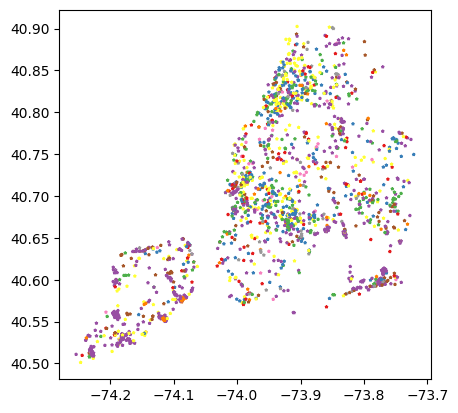

In [76]:
nyc_map.plot(column='USETYPE', marker='*', cmap='Set1', markersize=3)

<Axes: >

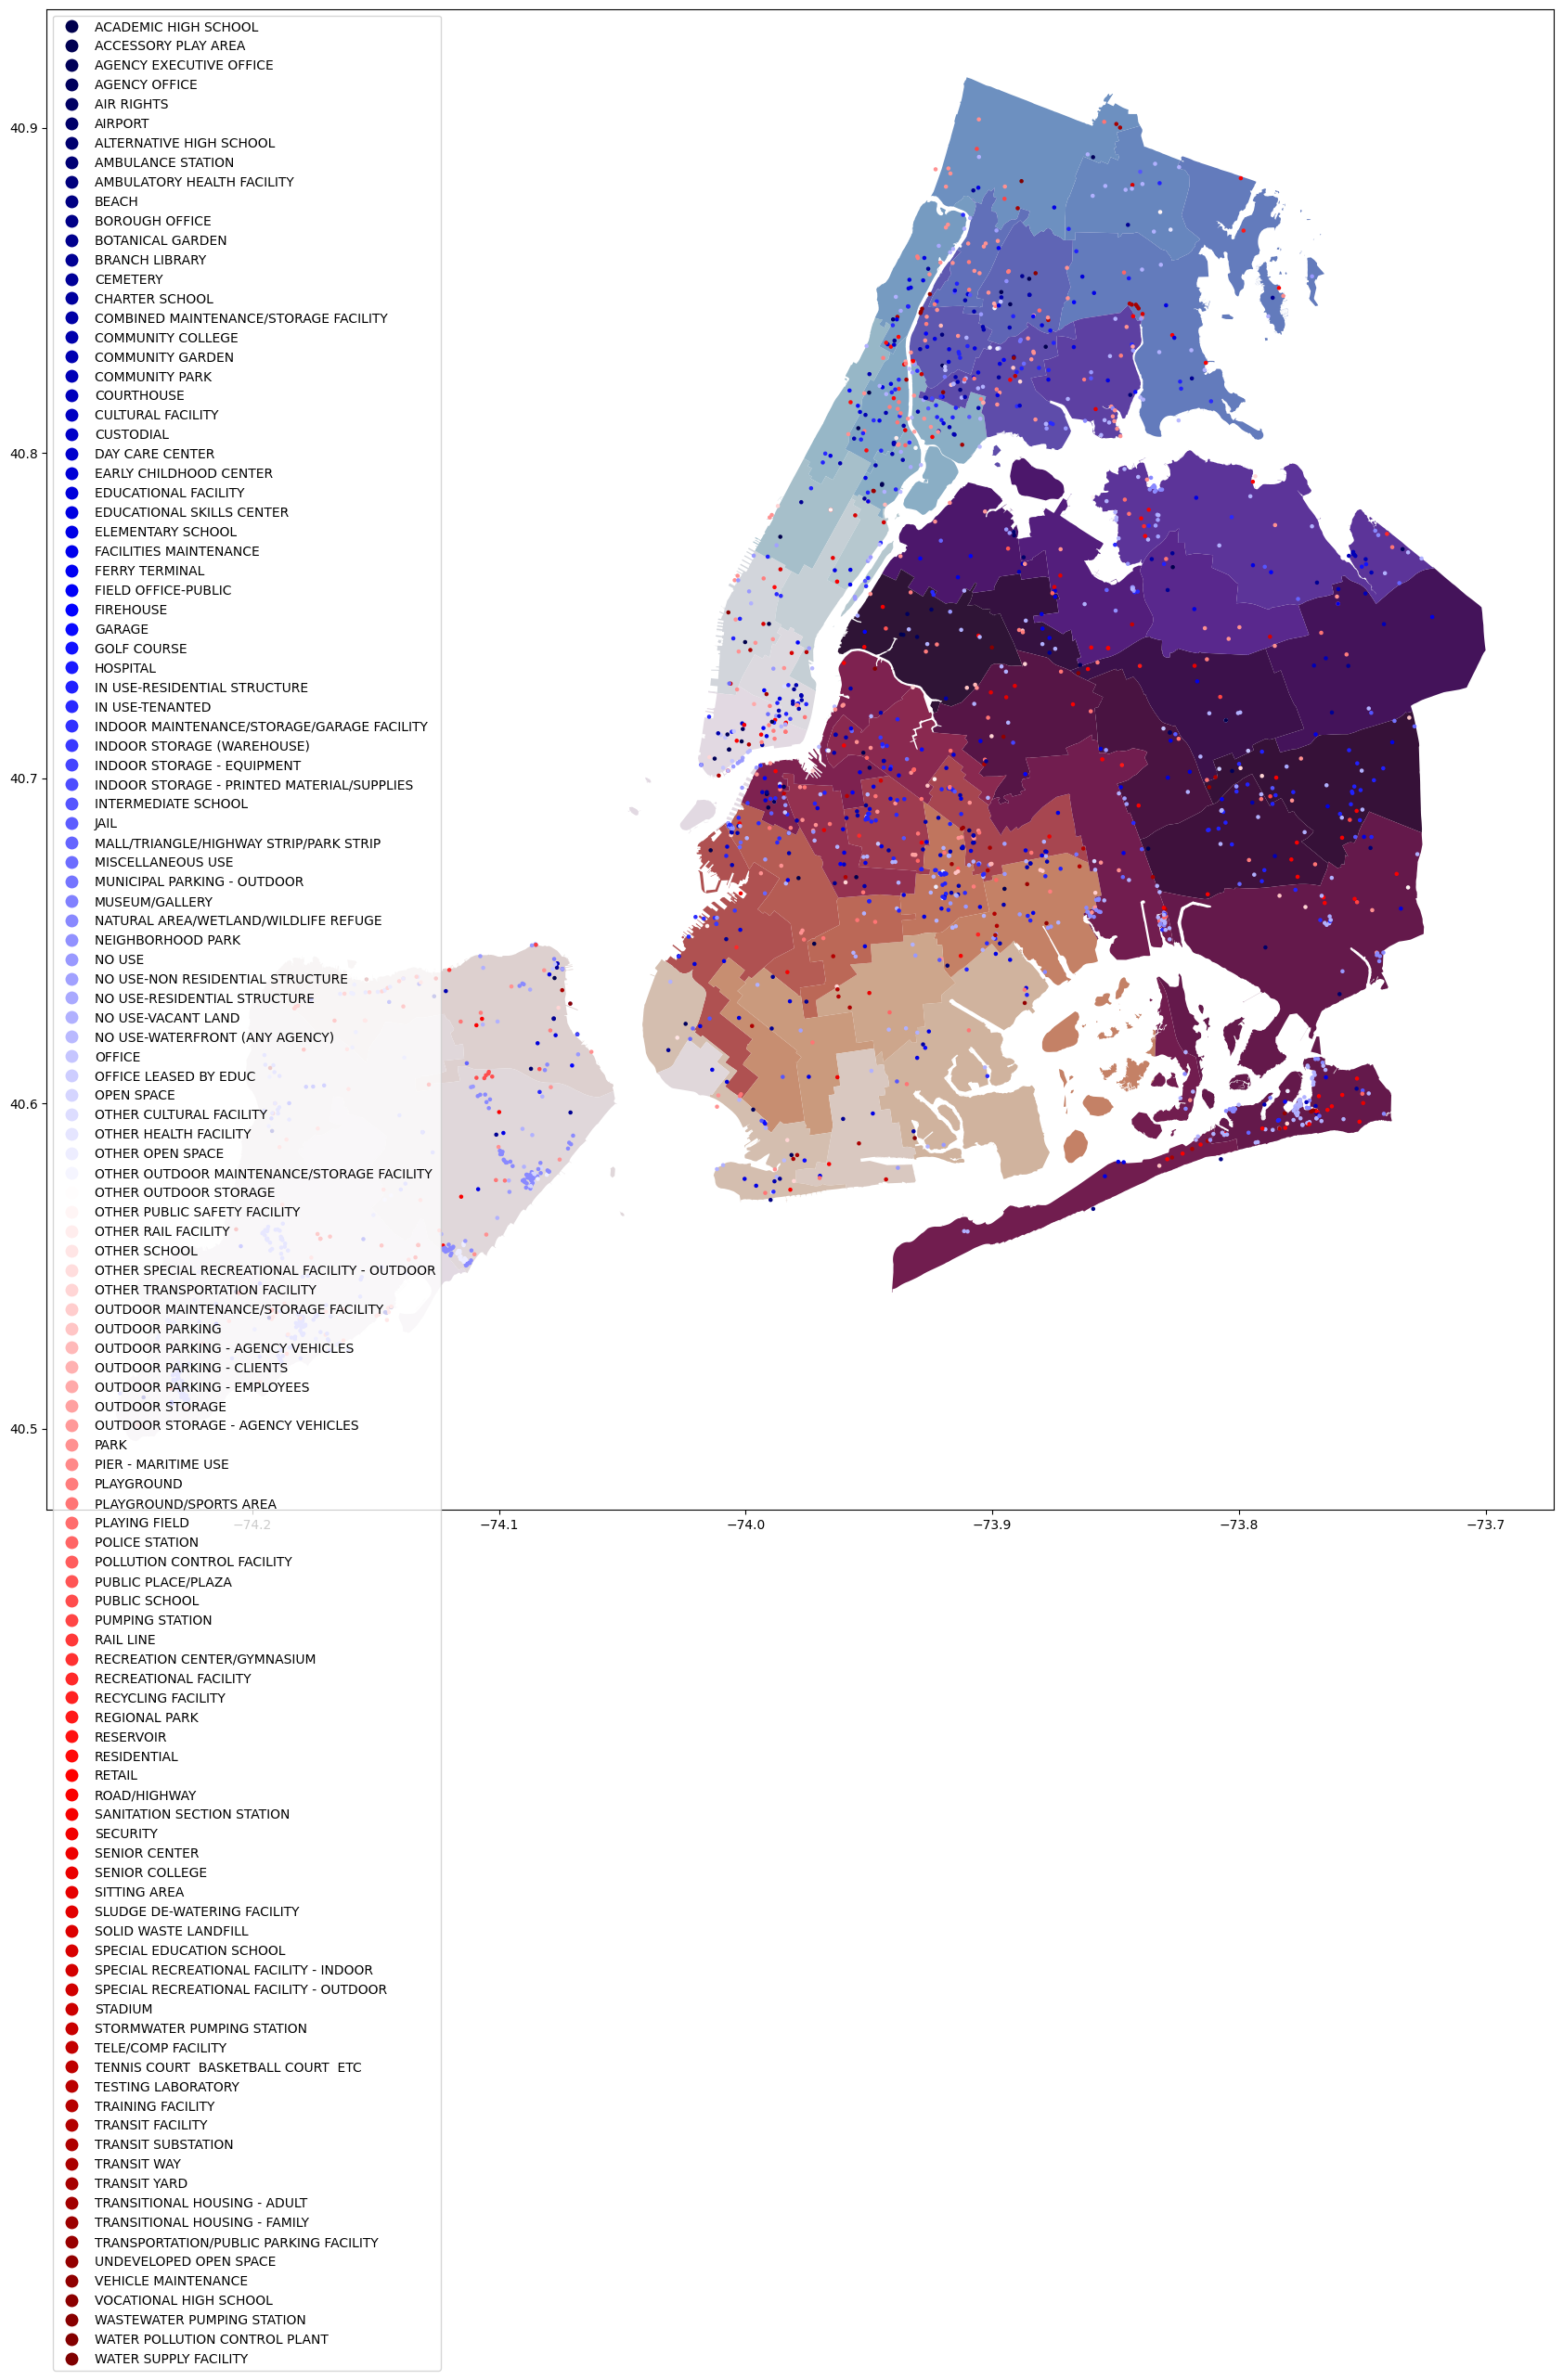

In [70]:
# Let's put them all together! Combine them as layers on a single map

fig, ax = plt.subplots(1, 1, figsize=(21, 21))
base = nycd_map.plot(column='CounDist', cmap='twilight', ax=ax)
nyc_map.plot(column='USETYPE', ax=base, marker='o', cmap='seismic', markersize=5, legend=True)

## Let's look at the variable AGENCY

<Axes: >

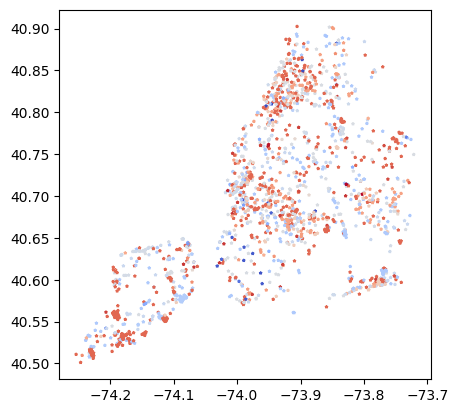

In [78]:
nyc_map.plot(column='AGENCY', marker='*', cmap='coolwarm', markersize=3)

<Axes: >

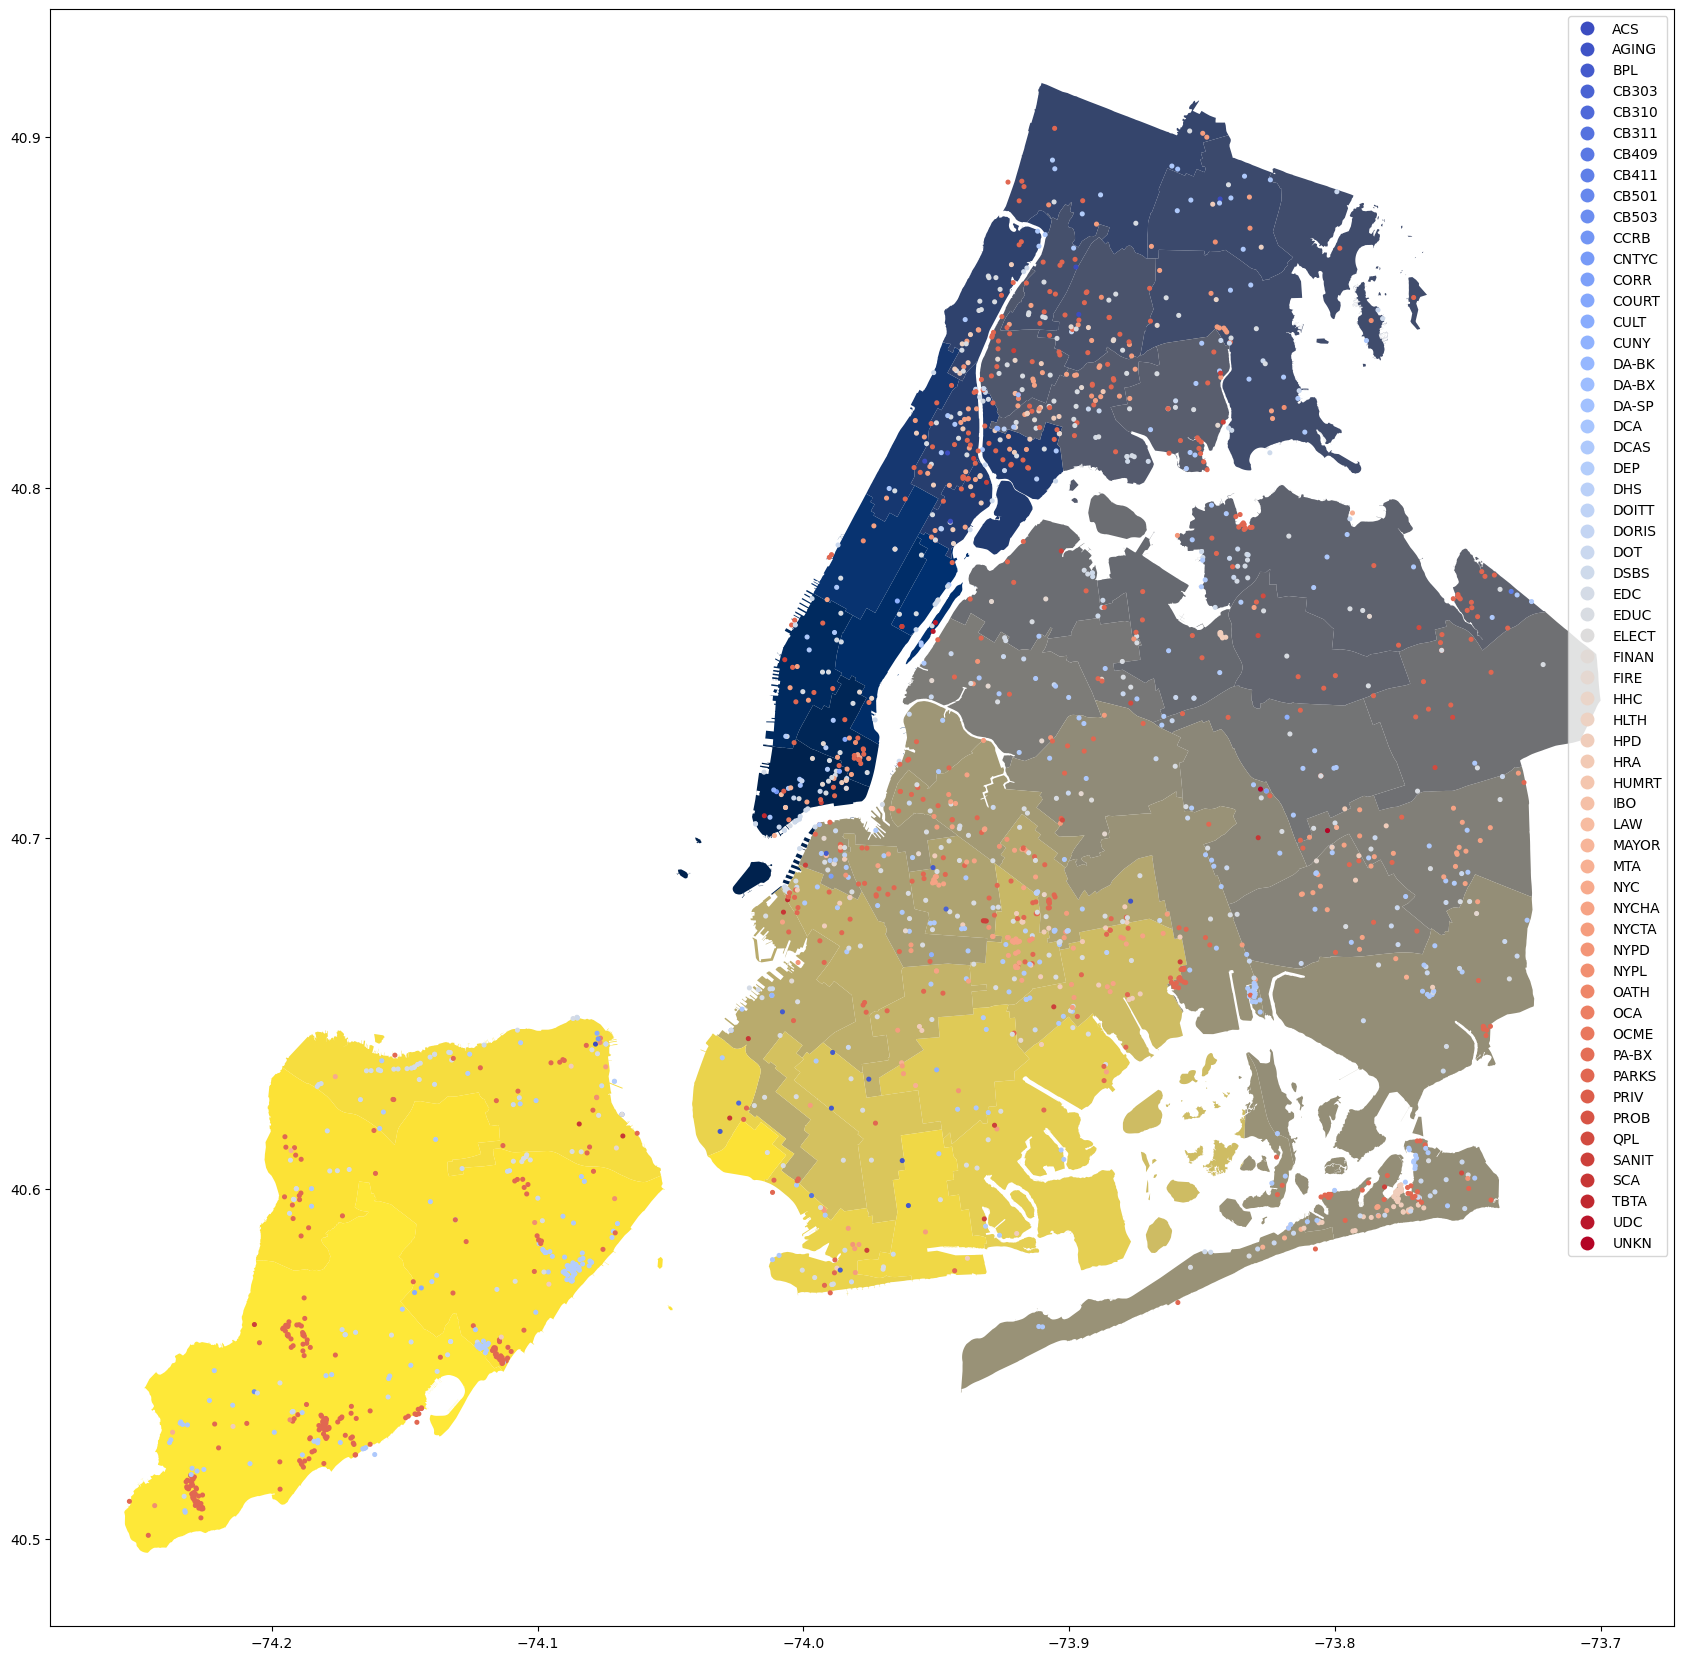

In [81]:
# Let's put them all together! Combine them as layers on a single map

fig, ax = plt.subplots(1, 1, figsize=(21, 21))
base = nycd_map.plot(column='CounDist', cmap='cividis', ax=ax)
nyc_map.plot(column='AGENCY', ax=base, marker='o', cmap='coolwarm', markersize=7, legend=True)

## Let's look at the variable OWNERSHIP

<Axes: >

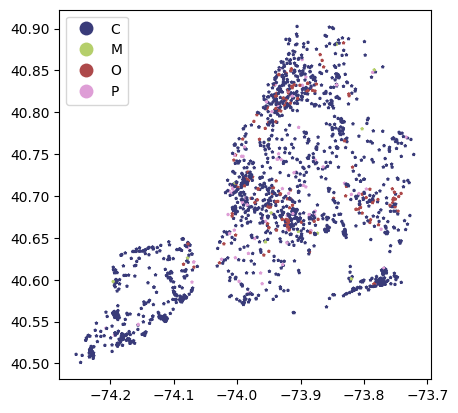

In [79]:
nyc_map.plot(column='OWNERSHIP', marker='*', cmap='tab20b', markersize=3, legend=True)

<Axes: >

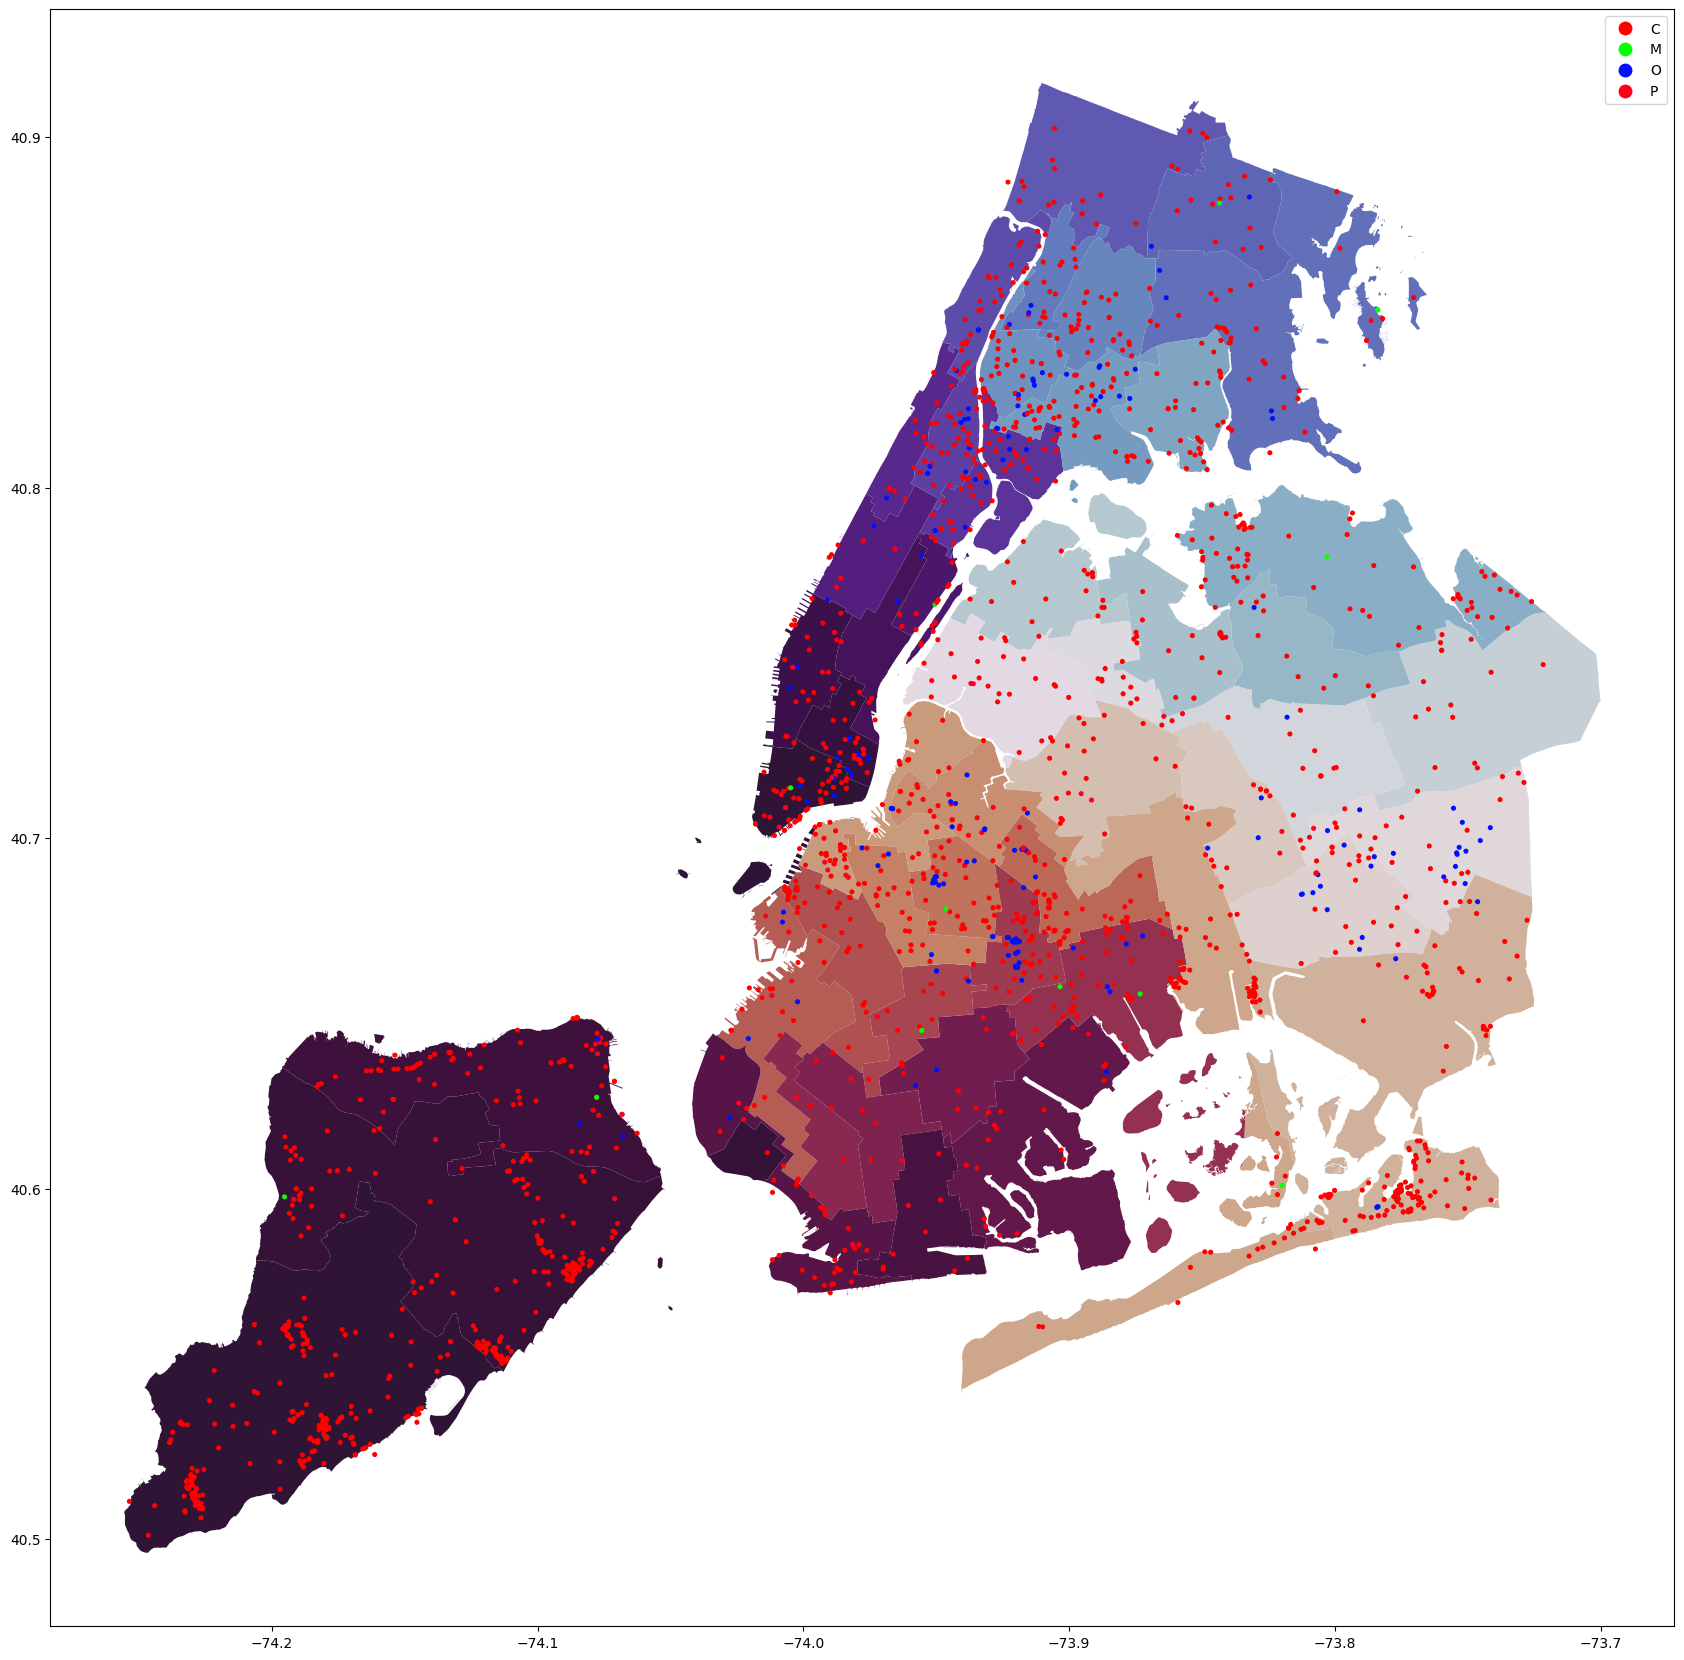

In [86]:
# Let's put them all together! Combine them as layers on a single map

fig, ax = plt.subplots(1, 1, figsize=(21, 21))
base = nycd_map.plot(column='CounDist', cmap='twilight_shifted', ax=ax)
nyc_map.plot(column='OWNERSHIP', ax=base, marker='o', cmap='hsv', markersize=7, legend=True)

## Let's look at the variable EXACTDESC

<Axes: >

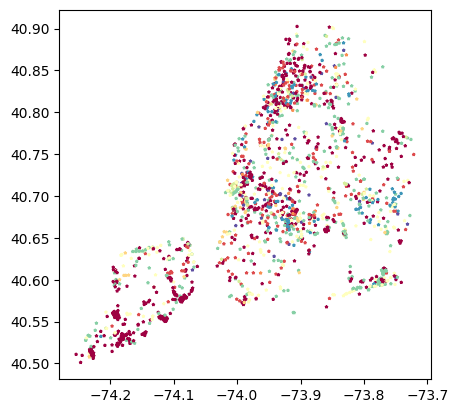

In [88]:
nyc_map.plot(column='EXCATDESC', marker='*', cmap='Spectral', markersize=3)

<Axes: >

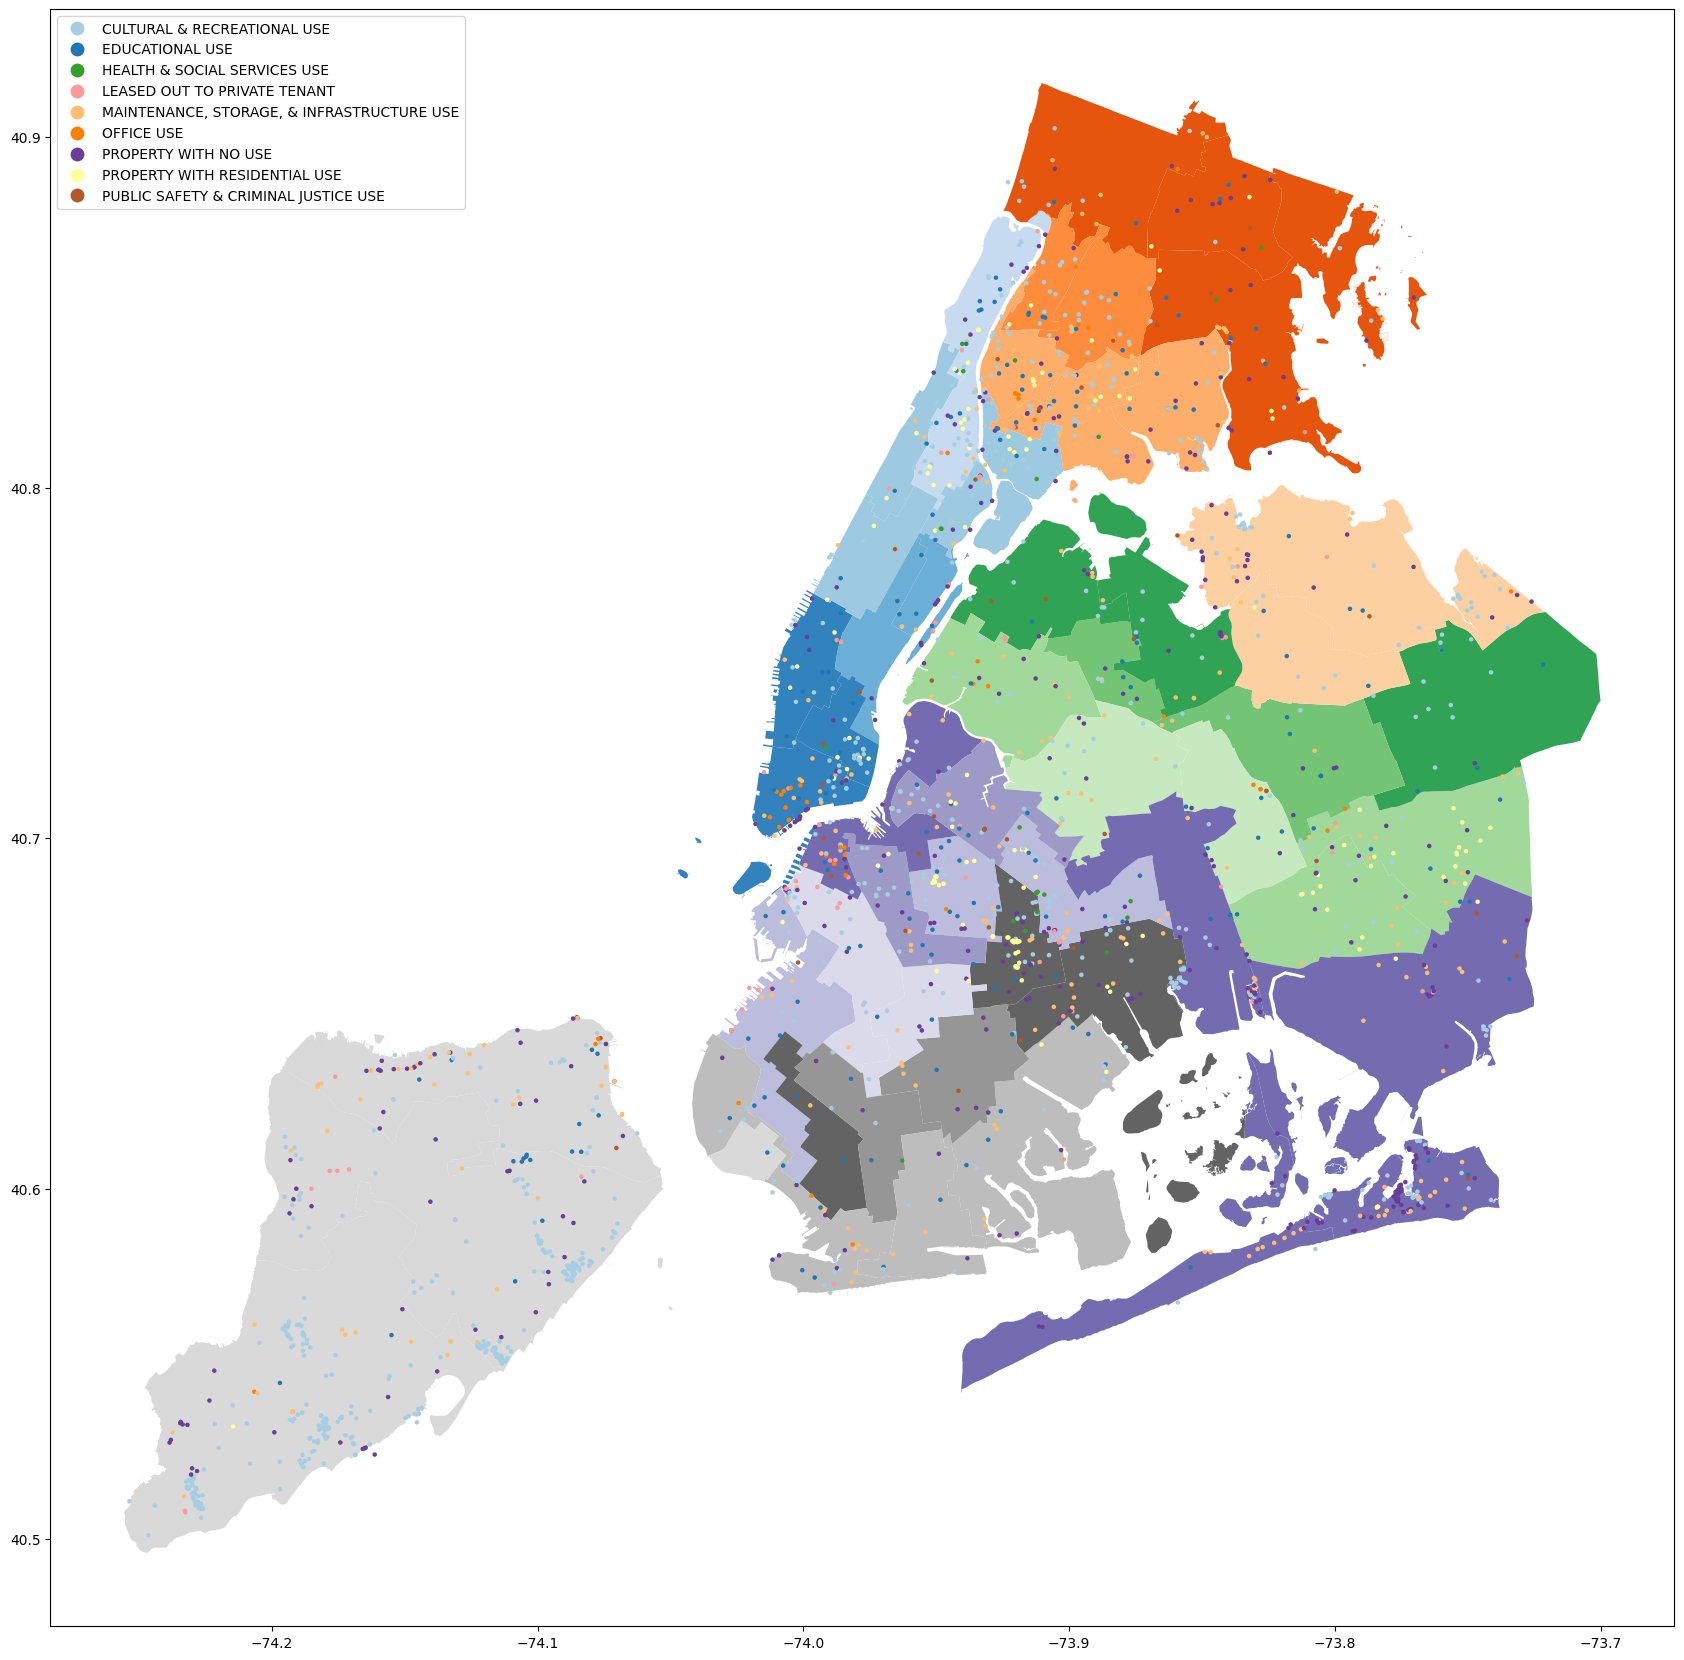

In [45]:
# Let's put them all together! Combine them as layers on a single map

fig, ax = plt.subplots(1, 1, figsize=(21, 21))
base = nycd_map.plot(column='CounDist', cmap='tab20c', ax=ax)
nyc_map.plot(column='EXCATDESC', ax=base, marker='o', cmap='Paired', markersize=5, legend=True)

## Activity

Go to https://www.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page and identify a geography for NYC that you want to map. Read the shapefile into a geoPandas DataFrame.

Use the NYC Open Data portal, https://opendata.cityofnewyork.us/, to find interesting data that contains GIS information.

Create a map to visualize the results.